# 損失関数

In [1]:
import numpy as np

In [2]:
# 二乗和誤差(sum of squared error)
def sum_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2) # ここでもブロードキャストで処理

In [3]:
# 正解データ
t = [0,0,1,0,0,0,0,0,0,0]
# 予測結果
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
# 正解データ
t = [0,0,1,0,0,0,0,0,0,0]
# 予測結果
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squared_error(np.array(y), np.array(t))

0.5975

In [5]:
# 交差エントロピー誤差
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [6]:
# 正解データ
t = [0,0,1,0,0,0,0,0,0,0]
# 予測結果
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [7]:
# 正解データ
t = [0,0,1,0,0,0,0,0,0,0]
# 予測結果
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

# ミニバッチ学習

In [8]:
# 訓練データの中から指定された個数のデータをランダムに選び出すコード
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_test.shape)

(60000, 784)
(10000, 10)


In [9]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # batch_maskにはbatch_size個分のインデックスがランダムに入っている
print(batch_mask)
x_batch = x_train[batch_mask] 
t_batch = t_train[batch_mask]

[26131 56958 41531 35182  8077 33193 58315 33290 12800 48492]


# バッチ対応版：交差エントロピー誤差の実装

In [10]:
# 正解データ
t = [0,0,1,0,0,0,0,0,0,0]
# 予測結果
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(np.array(y).ndim)
print(np.array(t).size)

1
10


In [11]:
# 交差エントロピー誤差
def cross_entropy_error(y, t):
    # 1行n列のベクトルデータ用(2次元に直す)
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    # バッチサイズの2次元データ用
    batch_size = y.shape[0]
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) / batch_size

In [12]:
# 交差エントロピー誤差 （tがone_hotではないとき）
def cross_entropy_error(y, t):
    # 1行n列のベクトルデータ用(2次元に直す)
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    # バッチサイズの2次元データ用
    batch_size = y.shape[0]
    print(y.shape)
    delta = 1e-7
    return -np.sum(t * np.log(y[np.arange(batch_size), t] + delta)) / batch_size # ブロードキャストで一括でやっている
# 正解データ
t = 7
# 予測結果
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

(1, 10)


16.11808865096182

In [13]:
# np.arrange は range のようなもの : https://note.nkmk.me/python-numpy-arange-linspace/

In [14]:
# チェックしたいところ
print(np.arange(batch_size))
# y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
# y = y.reshape(1, y.size)
y = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0], [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.3, 0.0, 0.0]])
t = 7
batch_size = y.shape[0]
print(batch_size)
print(y[np.arange(batch_size), t])

[0 1 2 3 4 5 6 7 8 9]
2
[0.1 0.3]


# 数値微分

In [15]:
# # 悪い実装例
# def numerical_diff(f, x):
#     h = 1e-50
#     return (f(x+h) - f(x)) / h

In [16]:
# 良い実装例
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h) # 2*hだとエラー、(2*h)としないといけなかった

In [17]:
# 数値微分の例
def function_1(x):
    return 0.01*x**2 + 0.1*x

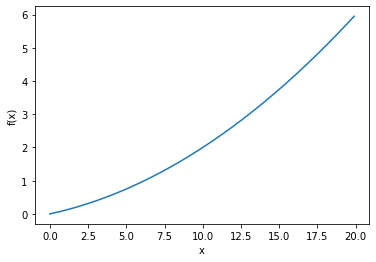

In [18]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [19]:
numerical_diff(function_1, 5)

0.1999999999990898

In [20]:
numerical_diff(function_1, 10)

0.2999999999986347

In [21]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

0.1999999999990898


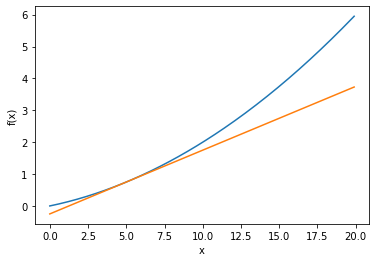

In [22]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

# 偏微分

In [23]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [24]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [25]:
def function_tmp2(x1):
    return 3.0*2.0 + x1*x1
numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [26]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 値を元に戻す
    return grad

In [27]:
numerical_gradient(function_2, np.array([3.0, 4.0])) # dtype=np.float64 などと指定しないとintだと0がたされても整数で切れる

array([6., 8.])

In [28]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [29]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

In [30]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [31]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=-0.1, step_num=100)

array([-2.48446059e+08,  3.31264378e+08])

In [32]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # ガウス分布で初期化
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [33]:
net = simpleNet()
print(net.W)

[[ 1.98983487 -1.08359022 -0.63599406]
 [-1.73687212 -0.77252487  1.34550063]]


In [34]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.36928399 -1.34542652  0.82935414]


In [35]:
np.argmax(p)

2

In [36]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.34729740167091555

In [37]:
def f(W):
    return net.loss(x, t)

In [38]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.12786741  0.04817553 -0.17604294]
 [ 0.19180111  0.0722633  -0.26406441]]


In [39]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

# 4.5 学習アルゴリズムの実装

In [40]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) # ガウス分布で初期化
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) # ガウス分布で初期化
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuray(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}

        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [42]:
# Mnistで学習
import numpy as np
from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = x_train.shape[0]

# ハイパーパラメータ
iters_num = 10000
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 勾配の計算
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 高速版

    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1エポックごとに認識精度を計算
    if i % iter_per_epoch == 0:
        train_acc = network.accuray(x_train, t_train)
        test_acc = network.accuray(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | ' + str(train_acc) + ', ' + str(test_acc))
        


train acc, test acc | 0.11236666666666667, 0.1135


KeyboardInterrupt: 